not able to make a bigger unet or train for more epochs due to lack of computing power

In [1]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bhavyabhola","key":"eb3e9700af77a8f741cacbf4ecd9061b"}'}

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d humansintheloop/semantic-segmentation-of-aerial-imagery

 57% 17.0M/29.6M [00:00<00:00, 49.0MB/s]
100% 29.6M/29.6M [00:00<00:00, 70.5MB/s]


In [8]:
!unzip semantic-segmentation-of-aerial-imagery

Archive:  semantic-segmentation-of-aerial-imagery.zip
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_001.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_002.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_003.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_004.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_005.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_006.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_007.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_008.jpg  
  inflating: Semantic segmentation dataset/Tile 1/images/image_part_009.jpg  
  inflating: Semantic segmentation dataset/Tile 1/masks/image_part_001.png  
  inflating: Semantic segmentation dataset/Tile 1/masks/image_part_002.png  
  inflating: Semantic segmentation dataset/Tile 1/masks/image_part_003.png  
  inflating: 

In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from patchify import patchify
import os
from sklearn.preprocessing import MinMaxScaler , StandardScaler

scaler = MinMaxScaler()
n_classes = 6
root_dir = "/content/Semantic segmentation dataset"
patch_size = 256

image_dataset = []  
for path, subdirs, files in os.walk(root_dir):
     
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   
        images = os.listdir(path)  
        images.sort()
        for i, image_name in enumerate(images):  
            if image_name.endswith(".jpg"): 
               
                image = cv.imread(path+"/"+image_name, 1)  
                SIZE_X = (image.shape[1]//patch_size)*patch_size 
                SIZE_Y = (image.shape[0]//patch_size)*patch_size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y)) 
                
                image = np.array(image)             
       
                
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  
        
                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):
                        
                        single_patch_img = patches_img[i,j,0,:,:]
                        
                        
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)
                        
                         
                                                  
                        image_dataset.append(single_patch_img)
      


Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_001.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_002.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_003.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_004.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_005.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_006.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_007.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_008.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 8/images/image_part_009.jpg
Now patchifying image: /content/Semantic segmentation dataset/Tile 2/images/image_part_001.jpg
Now patchifying image: /content/Semantic segmentat

In [10]:
mask_dataset = []  
for path, subdirs, files in os.walk(root_dir):
  
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'masks':   
        masks = os.listdir(path)  
        masks.sort()
        for i, mask_name in enumerate(masks):  
            if mask_name.endswith(".png"):  
                mask = cv.imread(path+"/"+mask_name, 1)  
                mask = cv.cvtColor(mask,cv.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size 
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size 
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  
                mask = np.array(mask)             
       
                #Extract patches from each image
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  
        
                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):
                        
                        single_patch_mask = patches_mask[i,j,0,:,:]
                        
                                                    
                        mask_dataset.append(single_patch_mask) 

Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_001.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_002.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_003.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_004.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_005.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_006.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_007.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_008.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 8/masks/image_part_009.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 2/masks/image_part_001.png
Now patchifying mask: /content/Semantic segmentation dataset/Tile 2/ma

In [11]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [12]:
print(image_dataset.shape)

(1305, 256, 256, 3)


467


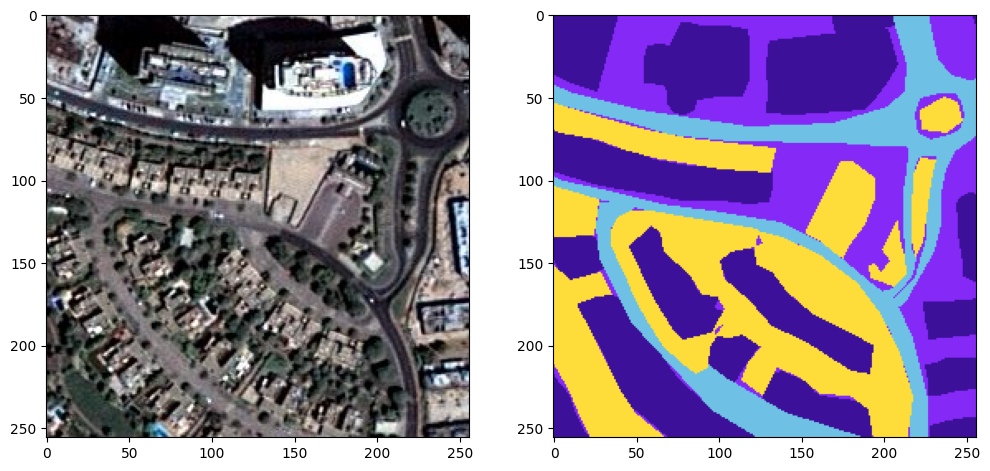

In [13]:
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
print(image_number)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.show()


In [16]:
# converting hex to rgb 
building = '#3C1098'.lstrip('#')
building = np.array(tuple(int(building[i:i+2],16) for i in (0,2,4)))

land = '#8429F6'.lstrip('#')
land = np.array(tuple(int(land[i:i+2],16) for i in (0,2,4)))

road = '#6EC1E4'.lstrip('#')
road = np.array(tuple(int(road[i:i+2],16)  for i in (0,2,4)))

vegetation = '#FEDD3A'.lstrip('#')
vegetation = np.array(tuple(int(vegetation[i:i+2],16)  for i in (0,2,4)))

water = '#E2A929'.lstrip('#')
water = np.array(tuple(int(water[i:i+2],16)  for i in (0,2,4)))

unlabeled = '#9B9B9B'.lstrip('#')
unlabeled = np.array(tuple(int(unlabeled[i:i+2],16)  for i in (0,2,4)))


In [17]:
def rgb_to_2d_label(label):
  label_seg = np.zeros(label.shape , dtype=np.uint8)
  label_seg[np.all(label==building , axis=-1)] = 0
  label_seg[np.all(label==land , axis=-1)] = 1
  label_seg[np.all(label==road , axis=-1)] = 2
  label_seg[np.all(label==vegetation , axis=-1)] = 3
  label_seg[np.all(label==water , axis=-1)] = 4
  label_seg[np.all(label==unlabeled , axis=-1)] = 5

  label_seg = label_seg[:,:,0]
  
  return label_seg

In [19]:
labels = []

for i in range(mask_dataset.shape[0]):
  label = rgb_to_2d_label(mask_dataset[i])
  labels.append(label)

labels = np.array(labels)
labels = np.expand_dims(labels , axis=3)

In [20]:
from keras.utils import to_categorical

labels_cat = to_categorical(labels , num_classes = n_classes)


In [21]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(image_dataset , labels_cat , test_size = 0.2, random_state = 42)

In [22]:
del image_dataset, mask_dataset, labels_cat, labels

In [23]:
import tensorflow as tf

def conv_2d(input_tensor , n_filters , kernal_size=3):
    x = input_tensor

    for i in range(2):
        x = tf.keras.layers.Conv2D(filters = n_filters , kernel_size = (kernal_size,kernal_size), activation='relu', padding='same')(x)

    return x


def encoder_block(inputs , n_filters , pool_size):

    f = conv_2d(inputs , n_filters=n_filters)
    x = tf.keras.layers.MaxPooling2D(pool_size)(f)     
    x = tf.keras.layers.BatchNormalization()(x)

    return f,x   

In [24]:
def encoder(inputs):

    f1 , p1 = encoder_block(inputs , n_filters=16 , pool_size=(2,2))#dropout=0.3
    f2 , p2 = encoder_block(p1 , n_filters=32 , pool_size=(2,2))#dropout=0.3
    f3 , p3 = encoder_block(p2 , n_filters=64 , pool_size=(2,2))#dropout=0.4
    

    return p3 , (f1, f2 , f3)

In [25]:
def bottle_neck(inputs):
    x = conv_2d(inputs , n_filters=128)
    return x

In [26]:
def decoder_block(inputs , conv_outputs , n_filters , kernal_size , strides):
    x = tf.keras.layers.Conv2DTranspose(n_filters , kernal_size , strides=strides , padding='same')(inputs)
    c = tf.keras.layers.concatenate([x , conv_outputs])
    c = tf.keras.layers.BatchNormalization()(c)
    c = conv_2d(c , n_filters , kernal_size=3)

    return c

In [27]:
def decoder(inputs , convs):

    f1,f2,f3 = convs

    
    x2 = decoder_block(inputs , f3 , n_filters=64 , kernal_size=(3,3) , strides=(2,2))#,dropout=0.4
    x3 = decoder_block(x2 , f2 , n_filters=32 , kernal_size=(3,3) , strides=(2,2))#,dropout=0.3
    x4 = decoder_block(x3 , f1 , n_filters=16 , kernal_size=(3,3) , strides=(2,2))#,dropout=0.3
    output = tf.keras.layers.Conv2D(n_classes,(1,1),activation='softmax')(x4)

    return output

In [28]:
def unet():
    inputs = tf.keras.layers.Input(shape=(256,256,3))
    encoder_output , convs = encoder(inputs)
    bottle_nck = bottle_neck(encoder_output)
    outputs = decoder(bottle_nck , convs)
    model = tf.keras.Model(inputs=inputs , outputs=outputs)

    return model

In [29]:
model = unet()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 16  2320        ['conv2d[0][0]']                 
                                )                                                             

In [30]:
from tensorflow.keras import backend as K 

def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)



def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [31]:
model.compile(optimizer = 'adam' , loss = [dice_coef_loss] , metrics=['accuracy'])
model.fit(x_train , y_train , batch_size=24 , epochs=10 , validation_data=(x_test,y_test))

Epoch 1/10
44/44 [==============================] - 41s 415ms/step - loss: -0.5910 - accuracy: 0.6591 - val_loss: -0.5793 - val_accuracy: 0.5877
Epoch 2/10
44/44 [==============================] - 10s 234ms/step - loss: -0.7166 - accuracy: 0.7188 - val_loss: -0.5836 - val_accuracy: 0.5636
Epoch 3/10
44/44 [==============================] - 11s 249ms/step - loss: -0.7434 - accuracy: 0.7461 - val_loss: -0.5896 - val_accuracy: 0.5814
Epoch 4/10
44/44 [==============================] - 10s 238ms/step - loss: -0.7515 - accuracy: 0.7527 - val_loss: -0.6720 - val_accuracy: 0.6727
Epoch 5/10
44/44 [==============================] - 11s 251ms/step - loss: -0.7625 - accuracy: 0.7631 - val_loss: -0.6268 - val_accuracy: 0.6266
Epoch 6/10
44/44 [==============================] - 11s 259ms/step - loss: -0.7630 - accuracy: 0.7636 - val_loss: -0.6909 - val_accuracy: 0.6920
Epoch 7/10
44/44 [==============================] - 11s 246ms/step - loss: -0.7703 - accuracy: 0.7707 - val_loss: -0.6873 - val_ac

In [32]:
model.save('ais.h5')